# Billionaire Predictions

In [71]:
#Imports herev
import pandas as pd                    
import matplotlib.pyplot as plt       
import seaborn as sns                 
sns.set()  
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


## 1. Introduction

The primary research goal is for the chosen model to yield reliable interpretive insights about the nature of the relationships between the variables in the dataset and to predict whether a billionaire is self-made as correctly as possible.

The secondary research goal is to build a predictive model that will effectively determine whether a billionaire is self-made or born into their wealth for new datasets. The explanatory variables considered from this dataset are finalWorth, industries, gender, age, and country.

Someone who may be interested in the final model could be someone looking to reach out specifically to a self-made billionaire for sponsorship or advertisement opportunities.

## 2. Dataset Discussion

Data Source:
https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset?resource=download

The rows in the dataset represent billionaires, originally compiled by researchers, building off Forbes' World's Billionaires List and other financial publications. The columns represent various details regarding each billionaire. While the dataset includes many different variables, it might also be useful to know how much these billionaires earn yearly from their industries and whether their net worth is increasing or decreasing.

The response variable is whether a billionaire is self-made or not. The goal is to determine whether it is possible to predict if a billionaire is self-made for future datasets using the chosen variables. The selected explanatory variables include:

* FinalWorth: The billionaire’s total net worth.
* Industries: The industry in which the billionaire’s company operates.
* Gender: The billionaire’s gender.
* Age: The billionaire’s age.
* Country: The country where the billionaire currently resides.

These explanatory variables were chosen because they are expected to have the most predictive power compared to others in the dataset when building the final model.


In [72]:
df=pd.read_csv('Billionaires Statistics Dataset.csv')
df=df[['finalWorth','industries','selfMade','gender','age','country']]
df

,finalWorth,industries,selfMade,gender,age,country
0,211000,Fashion & Retail,False,M,74.0,France
1,180000,Automotive,True,M,51.0,United States
2,114000,Technology,True,M,59.0,United States
3,107000,Technology,True,M,78.0,United States
4,106000,Finance & Investments,True,M,92.0,United States
...,...,...,...,...,...,...
2635,1000,Healthcare,True,M,51.0,China
2636,1000,Food & Beverage,False,M,80.0,United States
2637,1000,Manufacturing,True,M,60.0,China
2638,1000,Real Estate,True,M,71.0,China


In [73]:
original_rows=df.shape[0]
original_rows

2640

## 3. Dataset Cleaning

While I did not find any implicit missing values, there were 91 explicit N/A values that I dropped from the dataset. To maintain order and clarity when creating graphs and plots, I decided to focus only on the top five industries and top five countries in the dataset using the `.value_counts()` function, as there were many different categories present.  

Since I chose to work with only one numerical variable for this project, I did not drop any outliers.  

The original dataset contained 1,640 rows, and after preprocessing, it was reduced to 634 rows.

In [74]:
df.dtypes

finalWorth      int64
industries     object
selfMade         bool
gender         object
age           float64
country        object
dtype: object

In [75]:
df['country'].values

array(['France', 'United States', 'United States', ..., 'China', 'China',
       'Philippines'], dtype=object)

In [76]:
df.isna().sum()

finalWorth     0
industries     0
selfMade       0
gender         0
age           65
country       38
dtype: int64

The above code signals that there are no implicit missing values to be removed. There are, however, explicit missing values so we will remove those rows.

In [77]:
df=df.dropna()
new_rows=df.shape[0]
original_rows-new_rows

91

In [78]:
country_count = df['country'].value_counts()
country_count

country
United States           754
China                   504
India                   157
Germany                  88
United Kingdom           80
                       ... 
Portugal                  1
Georgia                   1
Eswatini (Swaziland)      1
Uzbekistan                1
Armenia                   1
Name: count, Length: 78, dtype: int64

Since the 'country' column have many levels with only a few observations, we can remove levels with less than 80 observations.

In [79]:
top_countries= country_count[country_count > 150].index
top_countries

Index(['United States', 'China', 'India'], dtype='object', name='country')

In [80]:
df1=df[df['country'].isin(top_countries)]
df1.shape[0]

1415

In [81]:
df1

,finalWorth,industries,selfMade,gender,age,country
1,180000,Automotive,True,M,51.0,United States
2,114000,Technology,True,M,59.0,United States
3,107000,Technology,True,M,78.0,United States
4,106000,Finance & Investments,True,M,92.0,United States
5,104000,Technology,True,M,67.0,United States
...,...,...,...,...,...,...
2634,1000,Healthcare,True,M,63.0,China
2635,1000,Healthcare,True,M,51.0,China
2636,1000,Food & Beverage,False,M,80.0,United States
2637,1000,Manufacturing,True,M,60.0,China


In [82]:
industry_count = df1['industries'].value_counts()
industry_count

industries
Technology                    228
Finance & Investments         205
Manufacturing                 201
Healthcare                    133
Food & Beverage               128
Fashion & Retail              109
Real Estate                    91
Diversified                    52
Energy                         50
Automotive                     47
Media & Entertainment          47
Sports                         35
Service                        32
Metals & Mining                15
Logistics                      14
Construction & Engineering     12
Telecom                        10
Gambling & Casinos              6
Name: count, dtype: int64

In [83]:
top_industries= industry_count[industry_count > 150].index
top_industries

Index(['Technology', 'Finance & Investments', 'Manufacturing'], dtype='object', name='industries')

In [84]:
df2=df1[df1['industries'].isin(top_industries)]
df2.shape[0]

634

In [85]:
new_new_rows=df2.shape[0]
original_rows-new_new_rows

2006

In [86]:
df = df2
df

,finalWorth,industries,selfMade,gender,age,country
2,114000,Technology,True,M,59.0,United States
3,107000,Technology,True,M,78.0,United States
4,106000,Finance & Investments,True,M,92.0,United States
5,104000,Technology,True,M,67.0,United States
9,80700,Technology,True,M,67.0,United States
...,...,...,...,...,...,...
2613,1000,Technology,True,F,68.0,United States
2614,1000,Technology,True,M,73.0,United States
2632,1000,Manufacturing,True,M,59.0,China
2633,1000,Manufacturing,True,M,53.0,China


Throughout this data cleaning process we dropped rows.

## 4. Preliminary Analysis

/Users/zoerosearies/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zoerosearies/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zoerosearies/miniconda3/lib/python3.11/site-packages/seaborn/_stats/counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
/Users/zoerosearies/miniconda3/lib/python3.11/site-packages/seaborn/_stats/counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, e

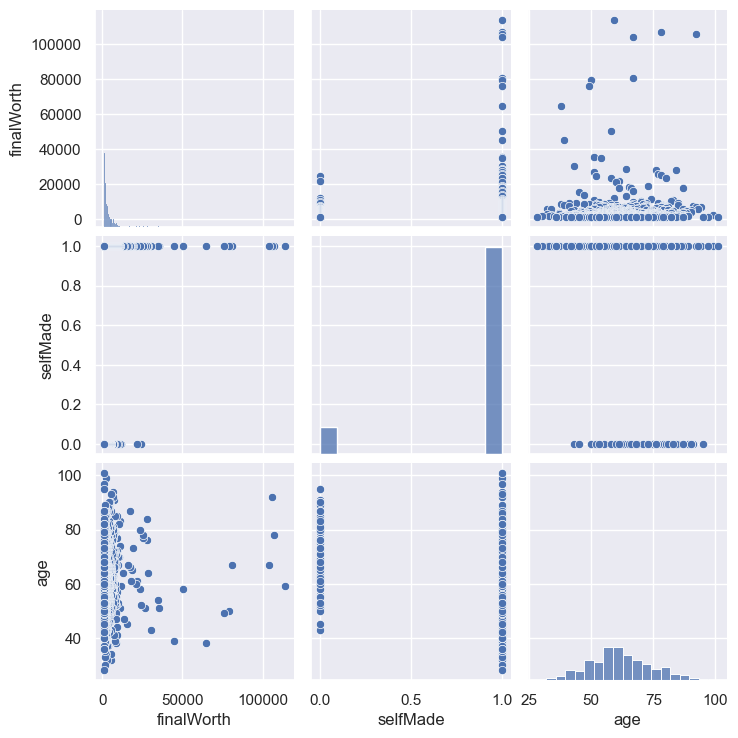

In [87]:
sns.pairplot(data=df)

In [88]:
df[['finalWorth','age']].corr()

,finalWorth,age
finalWorth,1.000000,0.046018
age,0.046018,1.000000


From this pairplot, we can see that there is a nonlinear relationship between selfMade and age with finalWorth. Because of this, we cannot interpret any strength of relationship between the two variables. In the analysis I decided not to remove outliers in order to maintain a thorough dataset. Removing outliers would also make the model worse at predicting outlier-like points so including them could improve the models performance overall. 


<Axes: xlabel='age', ylabel='industries'>

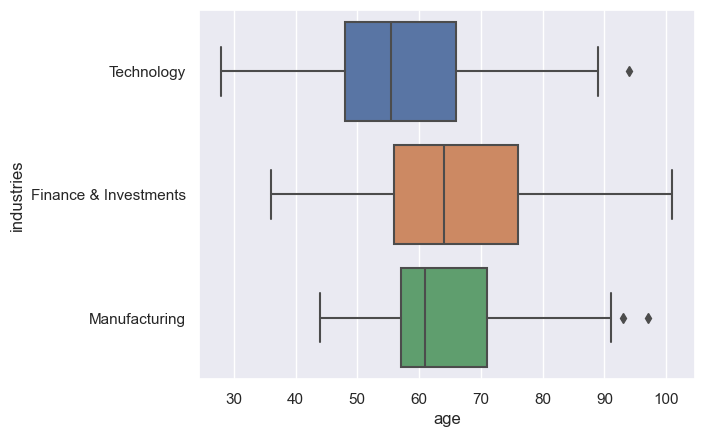

In [89]:
sns.boxplot(data=df, x='age',y='industries')

Since there is some difference in boxplot IQRs, this could indicate that an association exists between the industry and country of a billionaire.

<Axes: xlabel='age', ylabel='country'>

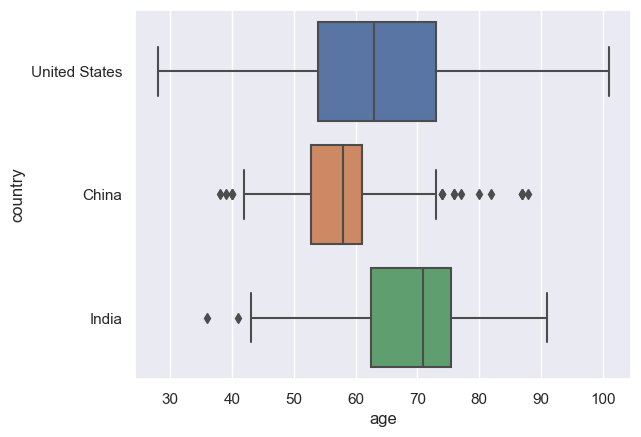

In [90]:
sns.boxplot(data=df, x='age',y='country')

There is some difference in boxplot IQRs, specifically between the countries of China and and India. This indicates that there is an association between age and country of a billionaire.

Text(0, 0.5, 'Relative Frequency')

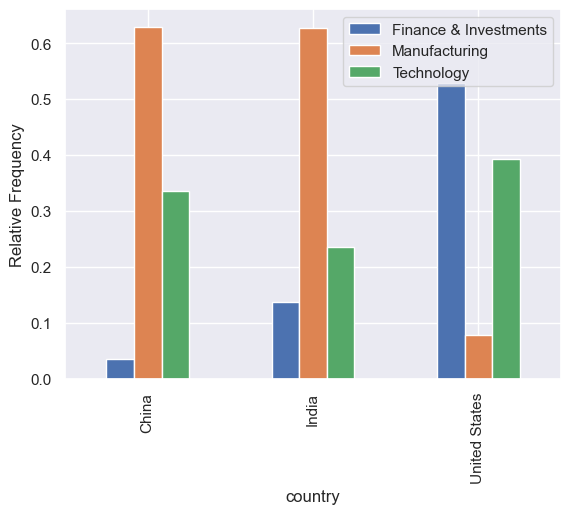

In [91]:
temp=pd.crosstab(df2['country'],df['industries'],normalize='index')
temp.plot.bar()
plt.legend(loc='upper right')
plt.ylabel('Relative Frequency')

Since at least one color had bars of different heights, this suggests an association between country and industry that a billionaire is from.

Text(0, 0.5, 'Relative Frequency')

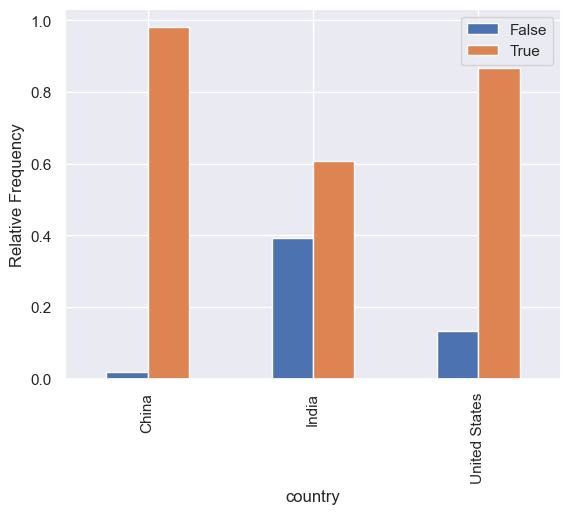

In [92]:
temp=pd.crosstab(df2['country'],df['selfMade'],normalize='index')
temp.plot.bar()
plt.legend(loc='upper right')
plt.ylabel('Relative Frequency')

Because the bars for both the self made and non self made colors were different for different countries, this suggests an association between the country a billionaire is from and whether or not they are self made.

Text(0, 0.5, 'Relative Frequency')

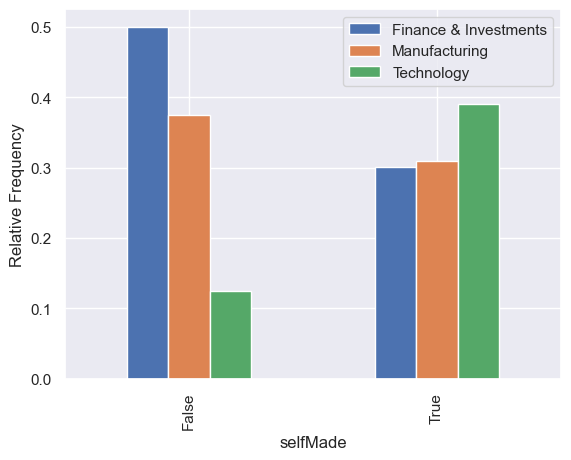

In [93]:
temp=pd.crosstab(df2['selfMade'],df['industries'],normalize='index')
temp.plot.bar()
plt.legend(loc='upper right')
plt.ylabel('Relative Frequency')

Because there is at least one color for which the bars are different heights(namely orange and purple), this suggests an association between a billionaire being self made and the industry they are in.

In [94]:
df['y']=df['selfMade'].replace({True:1, False:0})
df = df2.drop('selfMade', axis = 1)
df

/var/folders/2z/fct5b66x0nnc4c72gy8wbcnc0000gn/T/ipykernel_59815/2741332401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y']=df['selfMade'].replace({True:1, False:0})


,finalWorth,industries,gender,age,country,y
2,114000,Technology,M,59.0,United States,1
3,107000,Technology,M,78.0,United States,1
4,106000,Finance & Investments,M,92.0,United States,1
5,104000,Technology,M,67.0,United States,1
9,80700,Technology,M,67.0,United States,1
...,...,...,...,...,...,...
2613,1000,Technology,F,68.0,United States,1
2614,1000,Technology,M,73.0,United States,1
2632,1000,Manufacturing,M,59.0,China,1
2633,1000,Manufacturing,M,53.0,China,1


In [95]:
import warnings
from sklearn.exceptions import ConvergenceWarning
# Ignore scikit-learn ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)


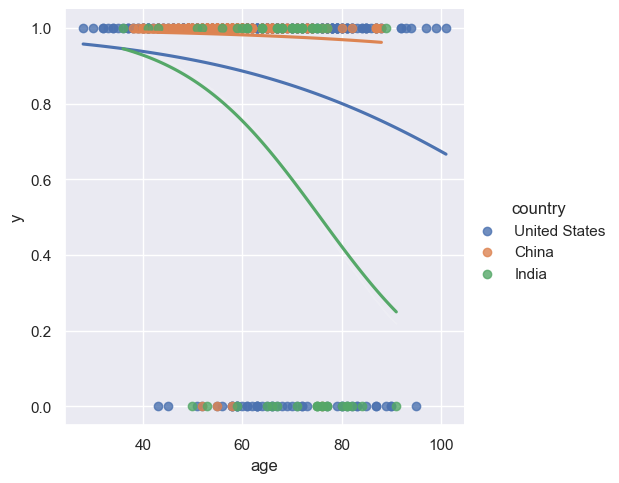

In [96]:
sns.lmplot(x='age',y='y',hue='country',data=df,logistic=True,ci=False)

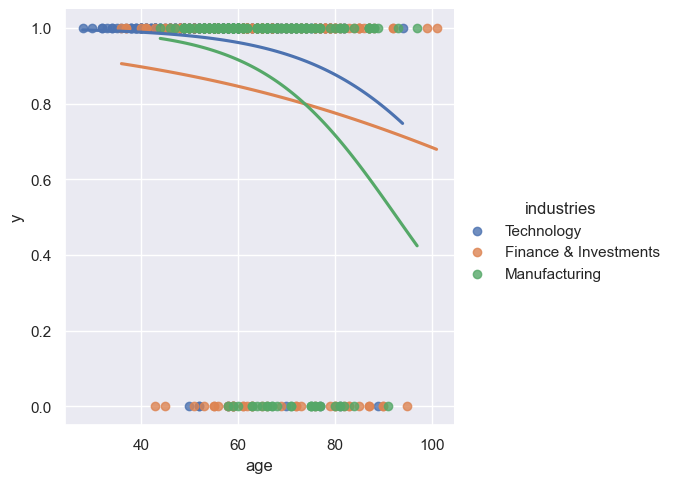

In [97]:
sns.lmplot(x='age',y='y',hue='industries',data=df,logistic=True,ci=False)

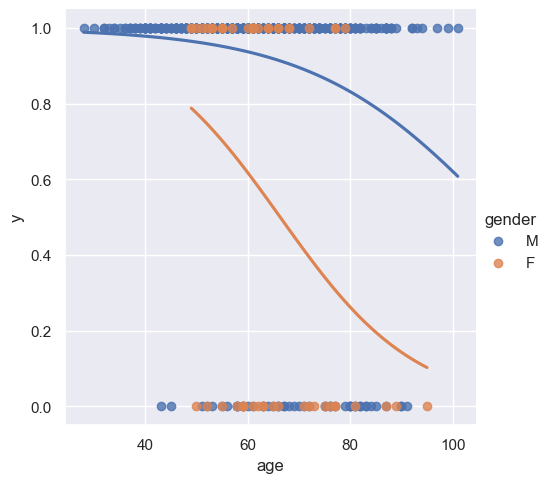

In [98]:
sns.lmplot(x='age',y='y',hue='gender',data=df,logistic=True,ci=False)

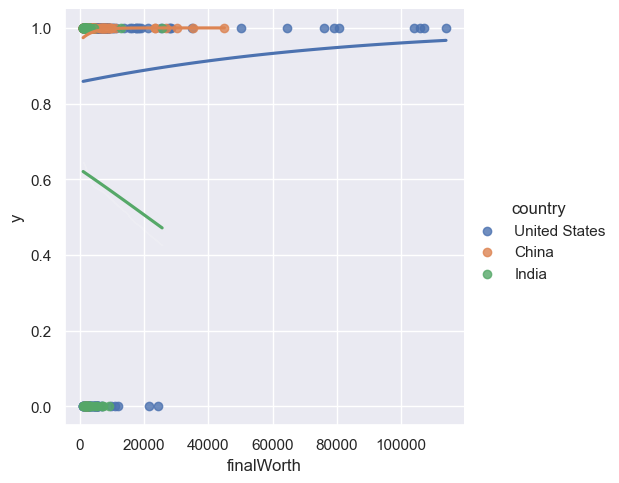

In [99]:
sns.lmplot(x='finalWorth',y='y',hue='country',data=df,logistic=True,ci=False)

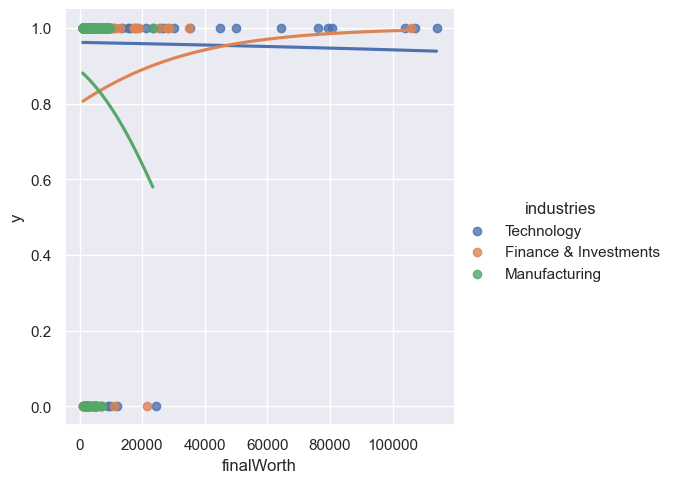

In [100]:
sns.lmplot(x='finalWorth',y='y',hue='industries',data=df,logistic=True,ci=False)

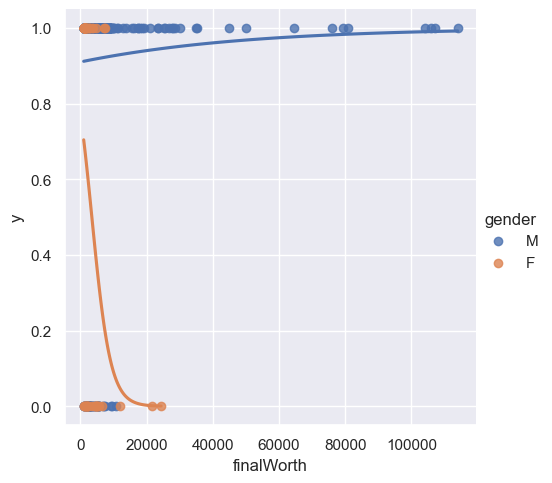

In [101]:
sns.lmplot(x='finalWorth',y='y',hue='gender',data=df2,logistic=True,ci=False)

In [102]:
gender_age_model1 =smf.logit('y~age+gender', data = df[df['gender'] == 'M']).fit()
display(gender_age_model1.summary().tables[1])
gender_age_model2 =smf.logit('y~age+gender', data = df[df['gender'] == 'F']).fit()
display(gender_age_model2.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.265795
         Iterations 7


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,6.0089,0.841,7.146,0.000,4.361,7.657
age,-0.0552,0.012,-4.593,0.000,-0.079,-0.032


Optimization terminated successfully.
         Current function value: 0.621538
         Iterations 5


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,5.0212,2.013,2.494,0.013,1.075,8.967
age,-0.0757,0.031,-2.433,0.015,-0.137,-0.015


#### Discussion

When checking for interaction terms, I observed significant slope variability in the plots. To simplify the process, I selected one slope from each plot that stood out the most as an interaction term.  

* In the first plot, the Germany slope was the most distinct from the others (which still varied but not as dramatically). Therefore, I created an interaction term between age and Germany.  
* In the second plot, the Healthcare slope differed the most from the rest, so I created an interaction term between age and Healthcare.  
* In the third plot, the slopes were relatively similar, so I did not select an interaction variable.  
* In the next two plots, while there was significant slope variability, I did not find one slope that stood out as the most different, so I did not choose any interaction variables.  
* In the final plot, there was considerable variability between the gender slopes. Therefore, I created interaction terms between finalWorth and Male and finalWorth and Female.  

These four interaction variables were selected as they captured the most notable differences. I also confirmed these choices using a numerical method by fitting logistic models and calculating the corresponding slopes. This numerical method is displayed above for the first two plots.  

In the interest of time and readability, I did not repeat this process for every single plot, but the approach would be the same and supports my interaction term selections. The next step is to fit the model.

## 5. Model Data Preprocessing

For part 5, I created our 0/1 response variable, created our matrix and target array, and scaled our numerical variable.

In [103]:
features=df.drop(['y'],axis=1)
features

,finalWorth,industries,gender,age,country
2,114000,Technology,M,59.0,United States
3,107000,Technology,M,78.0,United States
4,106000,Finance & Investments,M,92.0,United States
5,104000,Technology,M,67.0,United States
9,80700,Technology,M,67.0,United States
...,...,...,...,...,...
2613,1000,Technology,F,68.0,United States
2614,1000,Technology,M,73.0,United States
2632,1000,Manufacturing,M,59.0,China
2633,1000,Manufacturing,M,53.0,China


In [141]:
y=df['y']
y

2       1
3       1
4       1
5       1
9       1
       ..
2613    1
2614    1
2632    1
2633    1
2637    1
Name: y, Length: 634, dtype: int64

In [105]:
from sklearn.preprocessing import StandardScaler
num_col = ['finalWorth', 'age']
scaler=StandardScaler()
scaled_exp_vars = scaler.fit_transform(features[num_col])
df[num_col] = scaled_exp_vars
features[num_col] = scaled_exp_vars
features = pd.get_dummies(features, drop_first=True, dtype=int)
features

,finalWorth,age,industries_Manufacturing,industries_Technology,gender_M,country_India,country_United States
2,9.756997,-0.217417,0,1,1,0,1
3,9.130095,1.282584,0,1,1,0,1
4,9.040537,2.387848,0,0,1,0,1
5,8.861422,0.414163,0,1,1,0,1
9,6.774731,0.414163,0,1,1,0,1
...,...,...,...,...,...,...,...
2613,-0.363005,0.493110,0,1,0,0,1
2614,-0.363005,0.887847,0,1,1,0,1
2632,-0.363005,-0.217417,1,0,1,0,0
2633,-0.363005,-0.691101,1,0,1,0,0


## 6. Feature Selection with k-Fold Cross-Validation

Utilizing a 5-fold k-fold cross-validation of our dataset, I undertook a two-step feature selection process in order to discover the most optimizable model. This began with backwards elimination, with the full model having the highest average AUC score in round one. To solidify the results, I decided to conduct additional feature selection through forwards selection. This resulted in three rounds, with the highest AUC resulting in a score of 0.85. 

After performing both elminiations however, I came to the conclusion that the full model is still the best because it has the highest mean AUC score.

### **Backwards Elimination**

In [106]:
cross_val = KFold(n_splits = 5, shuffle = True, random_state = 207)

In [107]:
full_mod = LogisticRegression()
full_mod.fit(features,y)
auc = cross_val_score(full_mod, features, y, cv=cross_val, scoring="roc_auc")
auc.mean()

0.8604212072921603

#### ^ Full Model the highest

In [108]:
features_red1 = features[['finalWorth', 'age','industries_Manufacturing', 'industries_Technology', 'gender_M']]
auc1 = cross_val_score(full_mod, features_red1, y, cv=cross_val, scoring="roc_auc")
auc1.mean()

0.8017594608074846

In [109]:
features_red2 = features[['finalWorth', 'age','industries_Manufacturing', 'industries_Technology', 'country_India', 'country_United States']]
auc2 = cross_val_score(full_mod, features_red2, y, cv=cross_val, scoring="roc_auc")
auc2.mean()

0.7979832194696136

In [110]:
features_red3 = features[['finalWorth', 'age', 'gender_M', 'country_India', 'country_United States']]
auc3 = cross_val_score(full_mod, features_red3, y, cv=cross_val, scoring="roc_auc")
auc3.mean()

0.8418352783712171

In [111]:
features_red4 = features[['finalWorth','industries_Manufacturing', 'industries_Technology', 'gender_M', 'country_India', 'country_United States']]
auc4 = cross_val_score(full_mod, features_red4, y, cv=cross_val, scoring="roc_auc")
auc4.mean()

0.8389544081166166

In [112]:
features_red5 = features[['age','industries_Manufacturing', 'industries_Technology', 'gender_M', 'country_India', 'country_United States']]
auc5 = cross_val_score(full_mod, features_red5, y, cv=cross_val, scoring="roc_auc")
auc5.mean()

0.8600160945629576

### **Forwards Elimination**

### Round 1

In [113]:
features_1 = features[['finalWorth']]
auc11 =cross_val_score(full_mod, features_1, y, cv=cross_val, scoring="roc_auc")
auc11.mean()

0.40175352701483674

In [114]:
features_2 = features[['age']]
auc22 =cross_val_score(full_mod, features_2, y, cv=cross_val, scoring="roc_auc")
auc22.mean()

0.7030692819863207

In [115]:
features_3 = features[['industries_Manufacturing', 'industries_Technology']]
auc33 =cross_val_score(full_mod, features_3, y, cv=cross_val, scoring="roc_auc")
auc33.mean()

0.6549160396240993

In [116]:
features_4 = features[['gender_M']]
auc44 =cross_val_score(full_mod, features_4, y, cv=cross_val, scoring="roc_auc")
auc44.mean()

0.641986021165437

In [117]:
features_5 = features[['country_India', 'country_United States']]
auc55 =cross_val_score(full_mod, features_5, y, cv=cross_val, scoring="roc_auc")
auc55.mean()

0.7245309552794676

#### ^ Highest AUC

### Round 2

In [118]:
features_6 = features[['gender_M','country_India', 'country_United States']]
auc66 =cross_val_score(full_mod, features_6, y, cv=cross_val, scoring="roc_auc")
auc66.mean()

0.8053658466192115

#### ^ Highest AUC

In [119]:
features_7 = features[['industries_Manufacturing', 'industries_Technology', 'country_India', 'country_United States']]
auc77 =cross_val_score(full_mod, features_7, y, cv=cross_val, scoring="roc_auc")
auc77.mean()

0.7840603870547251

In [120]:
features_8 = features[['age','country_India', 'country_United States']]
auc88 =cross_val_score(full_mod, features_8, y, cv=cross_val, scoring="roc_auc")
auc88.mean()

0.7781675915975063

In [121]:
features_9 = features[['finalWorth','country_India', 'country_United States']]
auc99 =cross_val_score(full_mod, features_9, y, cv=cross_val, scoring="roc_auc")
auc99.mean()

0.6977474371556841

### Round 3

In [122]:
features_11 = features[['finalWorth','gender_M','country_India', 'country_United States']]
auc1111 =cross_val_score(full_mod, features_11, y, cv=cross_val, scoring="roc_auc")
auc1111.mean()

0.786971890741995

In [123]:
features_12 = features[['age','gender_M','country_India', 'country_United States']]
auc1212 =cross_val_score(full_mod, features_12, y, cv=cross_val, scoring="roc_auc")
auc1212.mean()

0.8378244716241872

In [124]:
features_13 = features[['industries_Manufacturing', 'industries_Technology','gender_M','country_India', 'country_United States']]
auc1313 =cross_val_score(full_mod, features_13, y, cv=cross_val, scoring="roc_auc")
auc1313.mean()

0.8508958767800825

#### ^ Highest AUC, HOWEVER

In [125]:
print("Full model AUC:", auc.mean())

Full model AUC: 0.8604212072921603


#### **Full Model is still higher**

The full model is still the best option, with an AUC score 0.86

## 7. Best Model Discussion

As mentioned previously, the best model found through my feature selection analysis was simply the full model with all five explanatory variables. When looking at the correlation between the two numerical variables, there does not appear to be any issues with multicollinearity; however, I only discussed one-dimensional results, and going into further dimensions may result in differing conclusions. Because the relationship between the two variables was nonlinear, I cannot use the correlation results as an indicator of strength. Additionally, because I scaled the numerical variables, I can more confidently use any slope interpretations from this model (as the standard deviations of the numerical variables are equal).  

When initially viewing the AUC score, I saw that the model produced a score of 0.894. Independently, this could indicate that the model is relatively effective at predicting if a billionaire is self-made based on the five explanatory variables. However, I wanted to seek out further analysis to verify the model’s interpretability, so I decided to analyze the model’s log likelihood (Part 8).

#### Train/Test Split

In [126]:
df_train, df_test = train_test_split(df, test_size=0.20, random_state=207)
df_test.head()

,finalWorth,industries,gender,age,country,y
1413,-0.255536,Technology,M,0.414163,United States,1
356,0.156429,Finance & Investments,M,-0.296364,United States,0
272,0.254942,Finance & Investments,M,0.808900,United States,1
1657,-0.291359,Technology,M,-1.559523,United States,1
1381,-0.255536,Finance & Investments,M,0.177320,United States,1


#### Features Matrix and Target Array

In [127]:
train_features = df_train.drop(['y'],axis=1)
test_features = df_test.drop(['y'],axis=1)
train_target = df_train[['y']]
test_target = df_test[['y']]
scaler2=StandardScaler()
scaled_exp_vars2 = scaler2.fit_transform(train_features[num_col])
scaled_exp_vars3 = scaler2.fit_transform(test_features[num_col])
train_features[num_col] = scaled_exp_vars2
test_features[num_col] = scaled_exp_vars3
train_features = pd.get_dummies(train_features, drop_first=True, dtype=int)
test_features = pd.get_dummies(test_features, drop_first=True, dtype=int)
train_features.head()

,finalWorth,age,industries_Manufacturing,industries_Technology,gender_M,country_India,country_United States
286,0.263029,0.512479,0,1,1,0,1
1988,-0.337367,0.191110,0,1,1,0,1
2399,-0.366418,-1.174708,0,1,1,0,0
1823,-0.327683,0.432137,0,0,1,0,1
362,0.175875,-0.290943,0,1,1,0,0


#### Fitting the Model and Slopes/Intercept

In [128]:
model = LogisticRegression(solver = 'newton-cg', max_iter = 1000)
model.fit(train_features,train_target)

LogisticRegression(max_iter=1000, solver='newton-cg')

In [129]:
model.intercept_

array([1.28434236])

In [130]:
df_slopes = pd.DataFrame(model.coef_.T, columns = ['full_model'], index=train_features.columns)
df_slopes.sort_values(by=['full_model'])

,full_model
country_India,-2.273495
country_United States,-1.524430
age,-0.391635
industries_Manufacturing,-0.247727
finalWorth,0.038849
industries_Technology,1.156069
gender_M,2.233071


#### Equations (^ is part of the equation)

        ^

$$ P(\text{SelfMade}) = \frac{1}{1 + e^{-\left(1.28 - 2.27 \cdot \text{Country\_India} - 1.52 \cdot \text{Country\_United States} - 0.39 \cdot \text{Age} - 0.25\cdot \text{Industries\_Manufacturing} + 0.04 \cdot \text{FinalWorth} + 1.16 \cdot \text{Industries\_Technology} + 2.23 \cdot \text{Gender\_M}\right)}} $$


      ^

$$ \text{log(odds)} = 
\ln \left( \frac{P(\text{SelfMade})}{1 - P(\text{SelfMade})} \right) = 1.28434236 - 2.273495
 \cdot \text{Country\_India} - 1.524430 \cdot \text{Country\_United States} - 0.391635 \cdot \text{Age} - 0.247727 \cdot \text{Industries\_Manufacturing} + 0.038849 \cdot \text{FinalWorth} + 1.156069 \cdot \text{Industries\_Technology} + 2.233071 \cdot \text{Gender\_M} $$

#### Slope interprability

In [131]:
train_features[['finalWorth','age']].corr()

,finalWorth,age
finalWorth,1.000000,0.027599
age,0.027599,1.000000


In [132]:
train_features[['finalWorth','age']].std()

finalWorth    1.000988
age           1.000988
dtype: float64

#### ROC Curve and TPR/FPR

In [133]:
test = model.predict_proba(test_features)[:,1]
test

array([0.95273247, 0.89296152, 0.84788914, 0.97652057, 0.87374643,
       0.91696792, 0.98354352, 0.99017872, 0.94880824, 0.95147236,
       0.8714134 , 0.73035342, 0.96994787, 0.9706563 , 0.97132187,
       0.84994086, 0.98868425, 0.99247302, 0.96622004, 0.96981839,
       0.94155217, 0.91015761, 0.89277601, 0.97146396, 0.80425979,
       0.70116804, 0.97080587, 0.96872531, 0.89163021, 0.78968539,
       0.9517403 , 0.94671064, 0.80333118, 0.37517533, 0.93024079,
       0.97064841, 0.92734074, 0.77486243, 0.64362743, 0.95640964,
       0.81563139, 0.99414164, 0.88071146, 0.7509388 , 0.97477858,
       0.81758162, 0.625906  , 0.97713969, 0.67413252, 0.97580672,
       0.9119526 , 0.93282696, 0.89960976, 0.96790545, 0.95023881,
       0.78979977, 0.82182914, 0.9147316 , 0.97792574, 0.97380767,
       0.89797823, 0.76203692, 0.93014609, 0.96508811, 0.85695613,
       0.96895731, 0.83059847, 0.99374788, 0.908754  , 0.96039074,
       0.9308074 , 0.88664752, 0.71418766, 0.96123859, 0.87147

In [134]:
fprs, tprs, thresholds = roc_curve(y_true = test_target, y_score=test)
pd.DataFrame({'fpr' : fprs, 'tpr' : tprs})

,fpr,tpr
0,0.000000,0.000000
1,0.000000,0.008850
2,0.000000,0.522124
3,0.000000,0.539823
4,0.000000,0.646018
5,0.071429,0.646018
6,0.071429,0.663717
7,0.142857,0.663717
8,0.142857,0.734513
9,0.214286,0.734513


In [135]:
auc = roc_auc_score(y_true = test_target, y_score=test)
auc

0.8938053097345133

In [136]:
def plot_roc(fprs, tprs, auc, lw=2):
    plt.plot(fprs, tprs, color='darkorange', lw=lw, label = 'ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

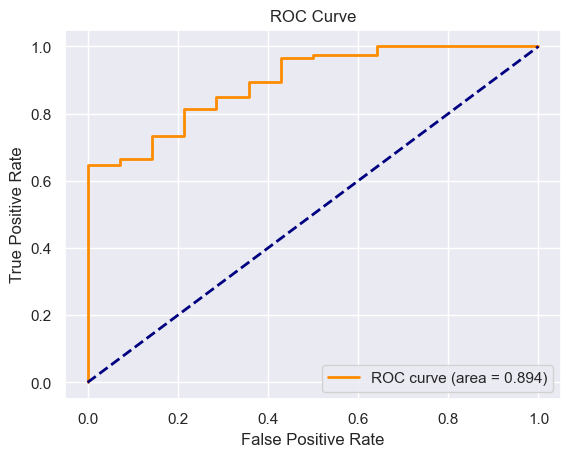

In [137]:
plot_roc(fprs, tprs, auc)

In [140]:
from sklearn.metrics import confusion_matrix
import numpy as np
def fpr_tpr_thresh(y, pred_prob, thresh):
    yhat = 1*(pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true= y, y_pred=yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    return pd.DataFrame({'threshold':[thresh],
                         'fpr':[fpr],
                         'tpr':[tpr]})
for thresh in np.arange(0,1.01,.01):
    print(fpr_tpr_thresh(test_target, test, thresh))

   threshold  fpr  tpr
0        0.0  1.0  1.0
   threshold  fpr  tpr
0       0.01  1.0  1.0
   threshold  fpr  tpr
0       0.02  1.0  1.0
   threshold  fpr  tpr
0       0.03  1.0  1.0
   threshold  fpr  tpr
0       0.04  1.0  1.0
   threshold  fpr  tpr
0       0.05  1.0  1.0
   threshold  fpr  tpr
0       0.06  1.0  1.0
   threshold  fpr  tpr
0       0.07  1.0  1.0
   threshold  fpr  tpr
0       0.08  1.0  1.0
   threshold  fpr  tpr
0       0.09  1.0  1.0
   threshold  fpr  tpr
0        0.1  1.0  1.0
   threshold  fpr  tpr
0       0.11  1.0  1.0
   threshold  fpr  tpr
0       0.12  1.0  1.0
   threshold  fpr  tpr
0       0.13  1.0  1.0
   threshold  fpr  tpr
0       0.14  1.0  1.0
   threshold  fpr  tpr
0       0.15  1.0  1.0
   threshold  fpr  tpr
0       0.16  1.0  1.0
   threshold  fpr  tpr
0       0.17  1.0  1.0
   threshold  fpr  tpr
0       0.18  1.0  1.0
   threshold  fpr  tpr
0       0.19  1.0  1.0
   threshold  fpr  tpr
0        0.2  1.0  1.0
   threshold  fpr  tpr
0       0.2

By using a predictive probability threshold of ^p0= 0.82 to classify the test predictive
probabilities, we get a false positve rate of 0.214286 and a true positive rate of 0.80531
Of the thresholds that we explored, this will create a test dataset classification that
has a high TPR that still does not allow the FPR to go over 25%. Actually, this threshold yields a relatively high TPR of approximately 81%. 

## 8. Additional Analysis/Insight

Below we will perform additional analysis on our full model,which is also our final model, to check the parsimoniousness of the model.

In [139]:
full_mod=smf.logit(formula='y~finalWorth+industries+gender+age+country', data=df_train).fit()
full_mod.summary()

Optimization terminated successfully.
         Current function value: 0.244690
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  507
Model:                          Logit   Df Residuals:                      499
Method:                           MLE   Df Model:                            7
Date:                Thu, 02 May 2024   Pseudo R-squ.:                  0.3119
Time:                        00:26:27   Log-Likelihood:                -124.06
converged:                       True   LL-Null:                       -180.30
Covariance Type:            nonrobust   LLR p-value:                 2.811e-21
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.8885      0.840      2.248      0.025       0.242       3.535
industries[T.Manufacturing]    -0.4749      0.512     -0.928      0.354      -1.478       0.529
industries[T.Technology]        1.5675      0.511      3.069      0.002       0.567       2.568
gender[T.M]                     2.9379      0.497      5.910      0.000       1.964       3.912
country[T.India]               -3.8167      0.761     -5.015      0.000      -5.308      -2.325
country[T.United States]       -2.8794      0.766     -3.760      0.000      -4.380      -1.379
finalWorth                      0.0239      0.266      0.090      0.928      -0.497       0.545
age                            -0.2930      0.181     -1.621      0.105      -0.647       0.061
===============================================================================================
"""

Above, I can see that the log likelihood value for this full model was -124.06. This relatively low value indicates that the model was not a particularly parsimonious model. This could indicate possible overfitting, though further analysis would need to be conducted to confirm this. Additionally, this advances my secondary research goal because I now know that the integrity of the model itself may not be reliable, potentially pointing to areas where I can improve the model beyond just the inclusion of specific variables. Through this, I considered whether I attained my secondary goal of making the model interpretable and applicable to new datasets.

## 9. Conclusion

 I would most likely not recommend someone use my final model to predict whether or not a billionaire is self-made. Even though the AUC was high, the LLF score was considerably low, making the results unreliable.

Additionally, I do not know that my final model will yield the highest possible average AUC score out of all the possible models because there are many different ones I did not test, and there are many combinations of explanatory variables that I did not explore in my research process.

One step I could have taken to make my research more complete is using an Elastic Net model. This would be useful because it combines LASSO and ridge models and deals with multicollinearity between predictor variables, which could have helped when selecting variables for the model.

Going forward, another caveat that I could avoid is my explanatory variable choice. I realize that using final net worth to predict whether or not a billionaire is self-made does not make the most logical sense in explaining my research. I chose the response variable because it was binary, but for future analysis, I know to ensure that the response variable I am predicting should be meaningfully dependent on the explanatory variables I choose.

## References

 https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset?resource=download